In [1]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 208 kB 4.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [2]:
#importando modulos mais usados
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
#para alterar o nome das colunas da tabela usamos:
#mapa para indicar qual coluna será renomeada e para qual nome
mapa = {
    "mileage_per_year": "milhas_por_ano",
    "model_year": "ano_do_modelo",
    "price": "preco",
    "sold": "vendido"
}

#comandos para renomear as "columns" baseado no que está no "mapa"
data = data.rename(columns = mapa)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
#para alterar valores trocando-os em um array ou conjunto de dados qualquer, podemos usar o comando "map" para isso
troca = {
    "yes": 1,
    "no": 0
}
#o comando map deve receber uma coluna à esquerda e um mapa para se basear à direita
data['vendido'] = data.vendido.map(troca)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
#queremos uma coluna com a idade do modelo
#faremos então o import de uma nova lib

from datetime import datetime

#lib = datetime; function() = today(); atributo = year
actualYear = datetime.today().year
data['idade_do_modelo'] = actualYear - data.ano_do_modelo
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [6]:
#trocaremos agora a coluna de milhas por km

data['km_por_ano'] = data.milhas_por_ano * 1.60934
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [8]:
data = data.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'])

In [9]:
data.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [21]:
import numpy as np

#separando dados
x = data[['preco', 'idade_do_modelo', 'km_por_ano']]
y = data['vendido']

SEED = 5
np.random.seed(SEED)

#recebe como params "dados x", "dados y" e o tamanho que o array de teste deve receber
#para controlar a aleatoriedade do metodo "train_test_split" podemos passar, como 3º param, antes de "test_size",
#um parametro de seed, onde o comando pode se basear para fazer o split
#podemos usar, também, o param "stratify" para controlar a proporcionalidade dos conjuntos de dados "x" e "y"
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print(train_x)

         preco  idade_do_modelo   km_por_ano
5474  11026.81               22  36445.11364
9663  95368.13                5  50711.91274
8489  11308.25               24  32384.74882
3294  79094.74               23  35674.23978
2297  40083.88               16  30212.13982
...        ...              ...          ...
3046  56784.54               16  20390.33780
9917  55447.27               12  21351.11378
4079  75140.63                7  42660.38472
2254  79294.64               22  31787.68368
2915  52065.91               21  18340.03864

[7500 rows x 3 columns]


In [ ]:
train_x.shape

(7500, 3)

In [ ]:
train_y.shape

(7500,)

In [ ]:
test_y.shape

(2500,)

In [19]:
model = LinearSVC()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

[1 1 1 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [20]:
taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

59.160000000000004


In [13]:
data.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


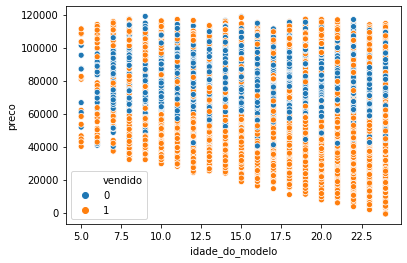

In [14]:
#lib para impressão de grafico
import seaborn as sns

#monta grafico 2d de morro com CONJUNTO_DE_DADOS, se baseando nas colunas X e Y, e usando Z como criterio de avaliaçao
sns.scatterplot(x='idade_do_modelo', y="preco", hue="vendido", data=data)

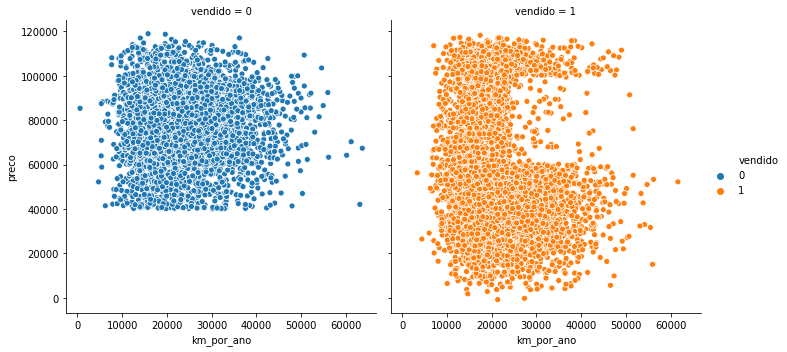

In [ ]:
#monta grafico 2d de morro com 2 colunas usando CONJUNTO_DE_DADOS, se baseando nas colunas X e Y, e usando Z como criterio de avaliaçao
sns.relplot(x="km_por_ano", y="preco", hue="vendido", col="vendido", data=data)

In [ ]:
#baseado na tabbela printada com o comando "sns.scatterplot(x="horas_esperadas", y="preco", hue=test_y, data=test_x)"
#vamos rodar em algoritmo dos valores minimos a maximos dos eixos x e y, pixel a pixel, pintando os pontos

#pegando valores minimos e maximos
x_min = test_x.km_por_ano.min()
x_max = test_x.km_por_ano.max()

y_min = test_x.preco.min()
y_max = test_x.preco.max()

print(x_min, x_max, y_min, y_max)

4715.3662 55982.50124 1757.97 118683.88


In [ ]:
model = SVC()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[1 0 0 ... 1 1 1]
77.84


In [ ]:
from sklearn.svm import OneClassSVM

model = OneClassSVM()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[-1 -1 -1 ... -1 -1 -1]
23.799999999999997


In [ ]:
from sklearn.svm import NuSVC

model = NuSVC()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[0 0 0 ... 0 0 1]
62.36000000000001


In [ ]:
from sklearn.svm import NuSVR

model = NuSVC()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[0 0 0 ... 0 0 1]
62.36000000000001


In [ ]:
from sklearn.svm import LinearSVR

model = NuSVC()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[0 0 0 ... 0 0 1]
62.36000000000001


In [ ]:
from sklearn.svm import l1_min_c

model = NuSVC()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[0 0 0 ... 0 0 1]
62.36000000000001


In [17]:
#podemos usar a lib do sklearn para gerar a baseline de comparação com nosso modelo atual.
#chama-se dummy classifier

from sklearn.dummy import DummyClassifier

#instancia DummyClassifier 
dummy_stratified = DummyClassifier()

#podemos treinar o dummy com os dados de treino e fazer a previsão depois, da mesma forma que fazemos com o model LinearSVC
dummy_stratified.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = dummy_stratified.predict(test_x)
print(previsoes)

#tira acurácia da previsao feita com o dummy, chutando tudo de um valor só
taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[1 1 1 ... 1 1 1]
59.160000000000004


In [22]:
#instancia DummyClassifier 
dummy_mostfrequent = DummyClassifier()

#podemos treinar o dummy com os dados de treino e fazer a previsão depois, da mesma forma que fazemos com o model LinearSVC
dummy_mostfrequent.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = dummy_mostfrequent.predict(test_x)
print(previsoes)

#tira acurácia da previsao feita com o dummy, chutando tudo de um valor só
taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[1 1 1 ... 1 1 1]
59.160000000000004


In [27]:
#instancia DummyClassifier 
dummy_stratified = DummyClassifier()

#podemos treinar o dummy com os dados de treino e fazer a previsão depois, da mesma forma que fazemos com o model LinearSVC
dummy_stratified.fit(train_x, train_y)

#no caso do comando score da lib DummyClassifier, retorna a acuracia de acordo com o que queremos testar "test_x"
#precisa dos params test_x e test_y
taxa_acerto = dummy_stratified.score(test_x, test_y) * 100
print(taxa_acerto)

#dessa forma, nao precisamos importar o accuracy_score, podemos usar esse comando acima

59.160000000000004


In [28]:
SEED = 5

#recebe como params "dados x", "dados y" e o tamanho que o array de teste deve receber
#para controlar a aleatoriedade do metodo "train_test_split" podemos passar, como 3º param, antes de "test_size",
#um parametro de seed, onde o comando pode se basear para fazer o split
#podemos usar, também, o param "stratify" para controlar a proporcionalidade dos conjuntos de dados "x" e "y"
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

#diferentes escalas em nossos conjuntos de dados podem impactar nas análises do algoritmo
#para igualarmos as escalas, temos um comando do modulo sklearn
from sklearn.preprocessing import StandardScaler

#as edmoais partes do codigo se parecem com a parte original, duas celulas acima
#aq, antes de criar e treinar nosso modelo, usaremos um escalador (scaler)

#cria o scaler
scaler = StandardScaler()

#treina o scaler de acordo com os dados divididos para train_x, como faz com o model (treina o processo de escalar)
scaler.fit(raw_train_x)

#usa o que aprendeu para transformar e reescalar train_x
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

#instancia SVC
model = SVC()

#aq usamos o comando "fit" para dizer à nossa instancia "model" para aprender,
#usando os "train_x" e classificando de acordo com as "train_y".
model.fit(train_x, train_y)

#para usar nosso modelo para identificar o que é o "animal_misterioso", usamos o comando ".predict()", passando como parametro o que queremos classificar
#o comando ".predict()" espera uma lista (array) como parametro
previsoes = model.predict(test_x)
print(previsoes)

taxa_acerto = accuracy_score(test_y, previsoes) * 100
print(taxa_acerto)

[0 1 1 ... 1 1 1]
77.48


In [29]:
#algoritmos de classificação como os que usamos até então não podem retornar quais os critérios de avaliação para sabermos porque está tomando as decisões de determinada forma
#por isso, vamos aprender nas prox sessões outros classificadores capazes de nos dizer esses critérios